# **Advanced Deep Neural Network (DNN) for Polynomial Regression**


*Objective: Implement a Multi-Layer Perceptron (MLP) to model and solve the polynomial regression problem: 𝒚=𝟓^𝒙𝟑−𝟖𝒙^𝟐−𝟕x +𝟏 with an emphasis on architectural complexity and performance analysis.*

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## **Network Architecture**

In [3]:
def mlp_summary(input_shape):
  model = Sequential([
      Dense(32, activation='relu', input_shape=input_shape, name='hidden_layer_1'),
      Dense(64, activation='relu', name='hidden_layer_2'),
      Dense(128, activation='relu', name='hidden_layer_3'),
      Dense(1, activation='sigmoid', name='output_layer')
  ])
  return model

input_shape = (1, 1)
model = mlp_summary(input_shape)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

#plot_model(model, to_file='mlp_model.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 1, 32)             64        
                                                                 
 hidden_layer_2 (Dense)      (None, 1, 64)             2112      
                                                                 
 hidden_layer_3 (Dense)      (None, 1, 128)            8320      
                                                                 
 output_layer (Dense)        (None, 1, 1)              129       
                                                                 
Total params: 10,625
Trainable params: 10,625
Non-trainable params: 0
_________________________________________________________________


2024-10-01 13:13:42.520571: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 764 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:42:00.0, compute capability: 7.5


## **Data generation and preprocessing**

In [5]:
# equation y = 5x^3 - 8x^2 - 7x + 1
np.random.seed(9)
x = np.random.uniform(-20 , 20, 10000) #uniformly distributed
def function(x):
  return 5*x**3 - 8*x**2 - 7*x + 1
y = function(x)

# polynomial feature expansion
x = x.reshape(-1, 1)
poly = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly.fit_transform(x)

# normalization and denormalization
scaler_x = MinMaxScaler(feature_range=(-1, 1))
x_poly_norm = scaler_x.fit_transform(x_poly)

scaler_y = MinMaxScaler(feature_range=(-1, 1))
y = y.reshape(-1, 1)
y_norm = scaler_y.fit_transform(y)
#x_poly_denorm = scaler.inverse_transform(x_poly_norm)
# y_pred_denorm = scaler_y.inverse_transform(y_test_pred)

## **Data Splitting**

In [6]:
x_train, x_temp, y_train, y_temp = train_test_split(x_poly_norm, y, train_size=0.9, random_state=9) # train 90%, temporary 10%
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, train_size=0.5, random_state=9) # validation 5%, test 5%

## **Build Model**

In [7]:
# build model
def mlp_summary(input_shape):
  model = Sequential([
      Dense(32, activation='relu', input_shape=input_shape, name='hidden_layer_1'),
      Dense(64, activation='relu', name='hidden_layer_2'),
      Dense(128, activation='relu', name='hidden_layer_3'),
      Dense(1, activation='linear', name='output_layer')
  ])
  return model

input_shape = (x_train.shape[1],)
model = mlp_summary(input_shape)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 32)                128       
                                                                 
 hidden_layer_2 (Dense)      (None, 64)                2112      
                                                                 
 hidden_layer_3 (Dense)      (None, 128)               8320      
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 10,689
Trainable params: 10,689
Non-trainable params: 0
_________________________________________________________________


## **Training**

In [8]:
#callbacks

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # long patience
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

y_test_pred = model.predict(x_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

Epoch 1/100


2024-10-01 13:15:20.762174: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x9fad670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-01 13:15:20.762234: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-10-01 13:15:20.768755: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-01 13:15:20.788279: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-10-01 13:15:20.933885: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


141/141 [==============================] - 2s 5ms/step - loss: 224640496.0000 - mae: 9842.5625 - val_loss: 241053584.0000 - val_mae: 10366.7939 - lr: 0.0010
Epoch 2/100
141/141 [==============================] - 1s 4ms/step - loss: 180300624.0000 - mae: 8563.9229 - val_loss: 126554160.0000 - val_mae: 7076.6738 - lr: 0.0010
Epoch 3/100
141/141 [==============================] - 1s 4ms/step - loss: 46990028.0000 - mae: 4188.2646 - val_loss: 11040916.0000 - val_mae: 2654.2190 - lr: 0.0010
Epoch 4/100
141/141 [==============================] - 1s 4ms/step - loss: 6425419.5000 - mae: 2121.6912 - val_loss: 3695937.2500 - val_mae: 1613.6772 - lr: 0.0010
Epoch 5/100
141/141 [==============================] - 1s 4ms/step - loss: 2452794.2500 - mae: 1273.5876 - val_loss: 1468913.5000 - val_mae: 941.2180 - lr: 0.0010
Epoch 6/100
141/141 [==============================] - 1s 4ms/step - loss: 1031045.9375 - mae: 736.8679 - val_loss: 715213.1875 - val_mae: 580.0193 - lr: 0.0010
Epoch 7/100
141/141 [

## **Evaluation**

Test MSE: 96.5275
Test R^2 Score: 1.0000


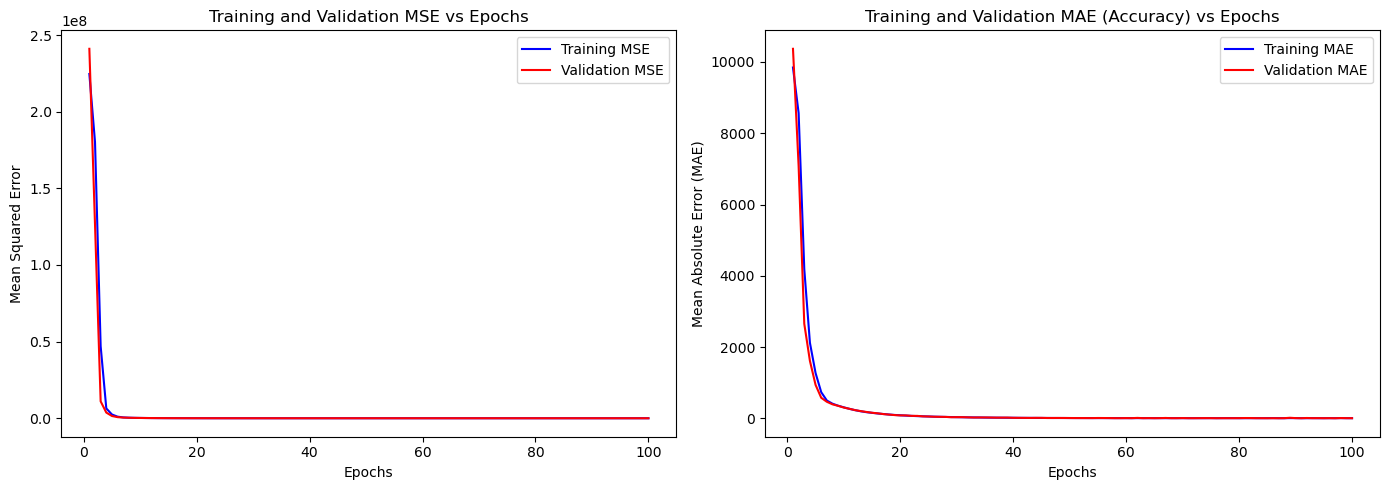

16/16 [==============================] - 0s 1ms/step
Test MSE: 96.5275
Test R^2 Score: 1.0000


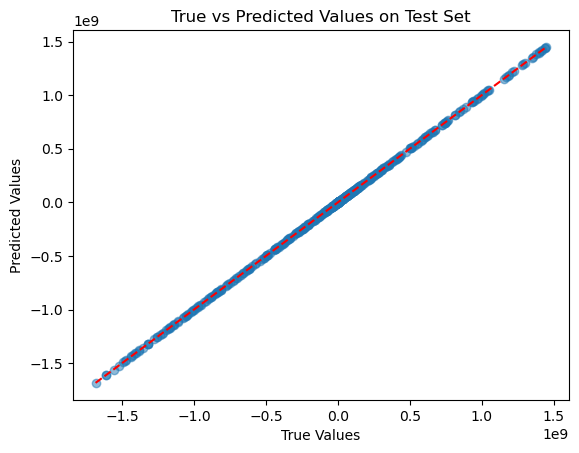

In [9]:
print(f"Test MSE: {mse_test:.4f}")
print(f"Test R^2 Score: {r2_test:.4f}")

epochs = range(1, len(history.history['loss']) + 1)

# plot MSE (error) vs epochs
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], 'b', label='Training MSE')
plt.plot(epochs, history.history['val_loss'], 'r', label='Validation MSE')
plt.title('Training and Validation MSE vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

# plot MAE (accuracy proxy) vs epochs
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['mae'], 'b', label='Training MAE')
plt.plot(epochs, history.history['val_mae'], 'r', label='Validation MAE')
plt.title('Training and Validation MAE (Accuracy) vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()

plt.tight_layout()
plt.show()

# eval
y_test_pred = model.predict(x_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse_test:.4f}")
print(f"Test R^2 Score: {r2_test:.4f}")

y_test_denorm = scaler_y.inverse_transform(y_test)
y_test_pred_denorm = scaler_y.inverse_transform(y_test_pred)

# Scatter Plot for Predicted vs Actual Values on Test Set
plt.scatter(y_test_denorm, y_test_pred_denorm, alpha=0.5)
plt.plot([y_test_denorm.min(), y_test_denorm.max()],
         [y_test_denorm.min(), y_test_denorm.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values on Test Set')
plt.show()


Discussion:

The network I implemented is a Multi-layered Perceptron (MLP) with 3 hidden layers. Each hidden layer uses the ReLu activation function. The last outpu layer utilizes a linear activation function to predict the continuous target 'y'.

I synthetically created a dataset of 10,000 uniformly distributed samples of x between -20 and +20. These values were then expanded using Polynomial features up to the 3rd degree.

The data was split into 3 sets: 90% for training, 5% for validation, and 5% for testing. Stratified sampling was not applied here but could be in the future. Then we trained the MLP using the Adam optimizer which is effective for handling sparse gradients. MSE loss function was chosen for this regression task. Additionally, early stopping and learning rate reduction was applied to prevent overfitting. Some of the challenges that occured was understanding what each line does, how they work and how they relate to the overall process of this assignment.
